# Life Expectancy and GDP
The goal of this project is to figure out if there is a relation between the Life Expectancy at birth and the GDP of several countries. Side goal is to try and strengthen visualization skills.

First, all necessary packages are imported for this project.

In [1]:
# Standard imports
import numpy as np                          # Basic calculation
import pandas as pd                         # Dataframe modification
import matplotlib.pyplot as plt             # Plot 1
import seaborn as sns                       # Plot 2
from scipy.stats.stats import pearsonr      # Correlation calculation

After the initialization of the packages, I want to take a first look at the data.

In [2]:
# Import data
data = pd.read_csv('all_data.csv')
print(data.head())

# Adjust name of USA
data.Country.mask(data.Country == 'United States of America', 'USA', inplace=True)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Next, I am going to take a look at the distribution of Life Expectancy. 

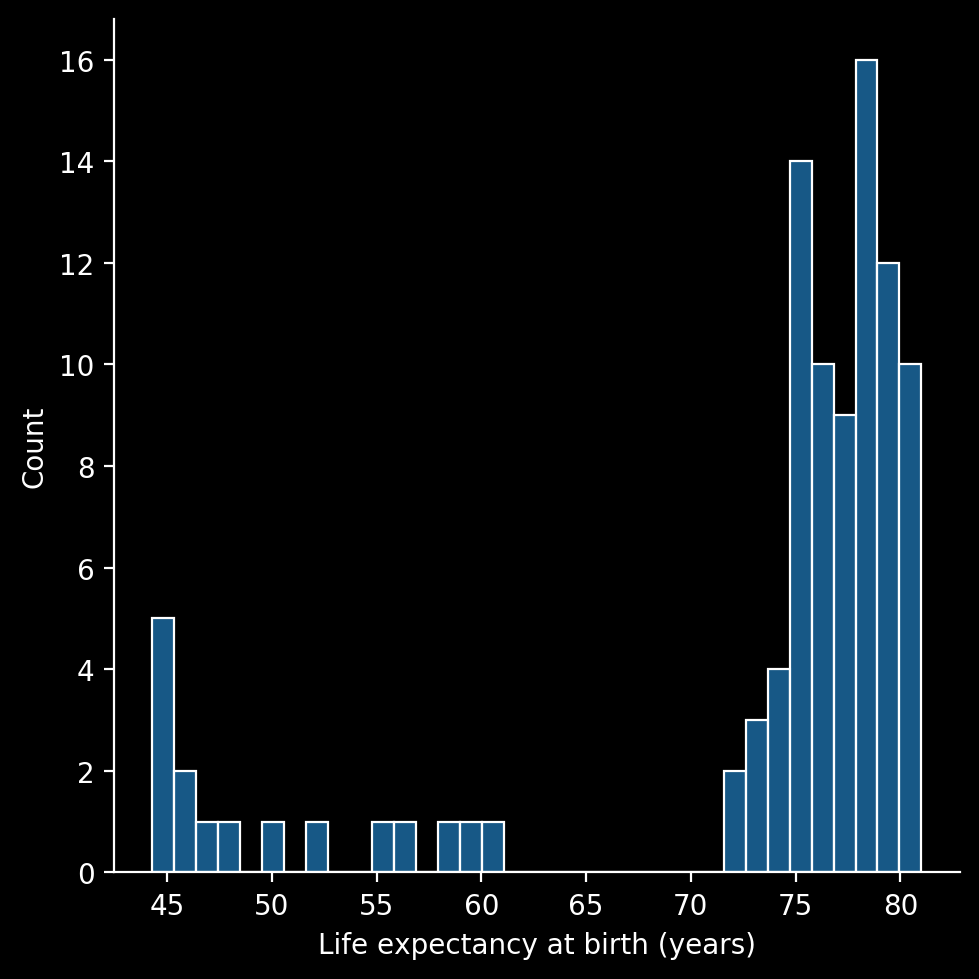

<Figure size 480x360 with 0 Axes>

In [17]:
# Create plot for distribution of Life Expectancy
sns.displot(data['Life expectancy at birth (years)'], bins=35, kde=False)
plt.show()
plt.clf()

The figure shows me, that most of the people from the analyzed countries are expected to become around 75 and 80 years old. On the other hand, there are some observations with lower Life Expectancies, from 45 to 60 years. The distribution looks normal with a left skew.

After the plot of the distribution, I am going to display the development of the Life Expectancy and GDP. For that, I am going to calculate the means of each variable for every year first.

In [3]:
# Create empty lists and loop through each year
mean_LE = []
mean_GDP = []

for year in data.Year.unique():
    temp_data = data.loc[data['Year']==year]
    mean_LE.append(np.mean(temp_data['Life expectancy at birth (years)']))
    mean_GDP.append(np.mean(temp_data['GDP'])/1000000000000)

Now I want to create a visualization of the development of the mean Life Expectancy and mean GDP in one graph.

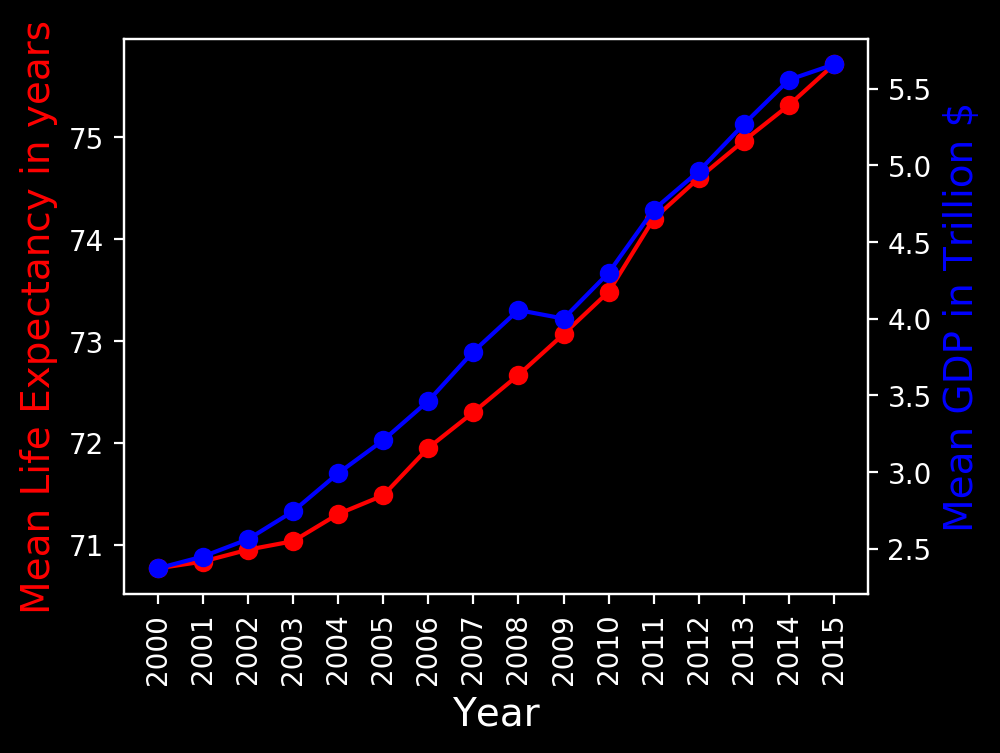

<Figure size 480x360 with 0 Axes>

In [4]:
# Create first plot in one graph
fig,ax = plt.subplots()
ax.plot(data.Year.unique(),
        mean_LE,
        color="red", 
        marker="o")
ax.set_xlabel("Year", fontsize = 14)
ax.set_xticks(data.Year.unique())
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel("Mean Life Expectancy in years",
              color="red",
              fontsize=14)

# Create second plot in one graph
ax2=ax.twinx()
ax2.plot(data.Year.unique(),
         mean_GDP,
         color="blue",
         marker="o")
ax2.set_ylabel("Mean GDP in Trillion $",color="blue",fontsize=14)
plt.show()
plt.clf()

The graph above indicates, that the mean Life Expectancy and the mean GDP grew almost in the same pattern from 2000 to 2015.

Now let's focus on the development of Life Expectancy and GDP in each of the 6 countries.

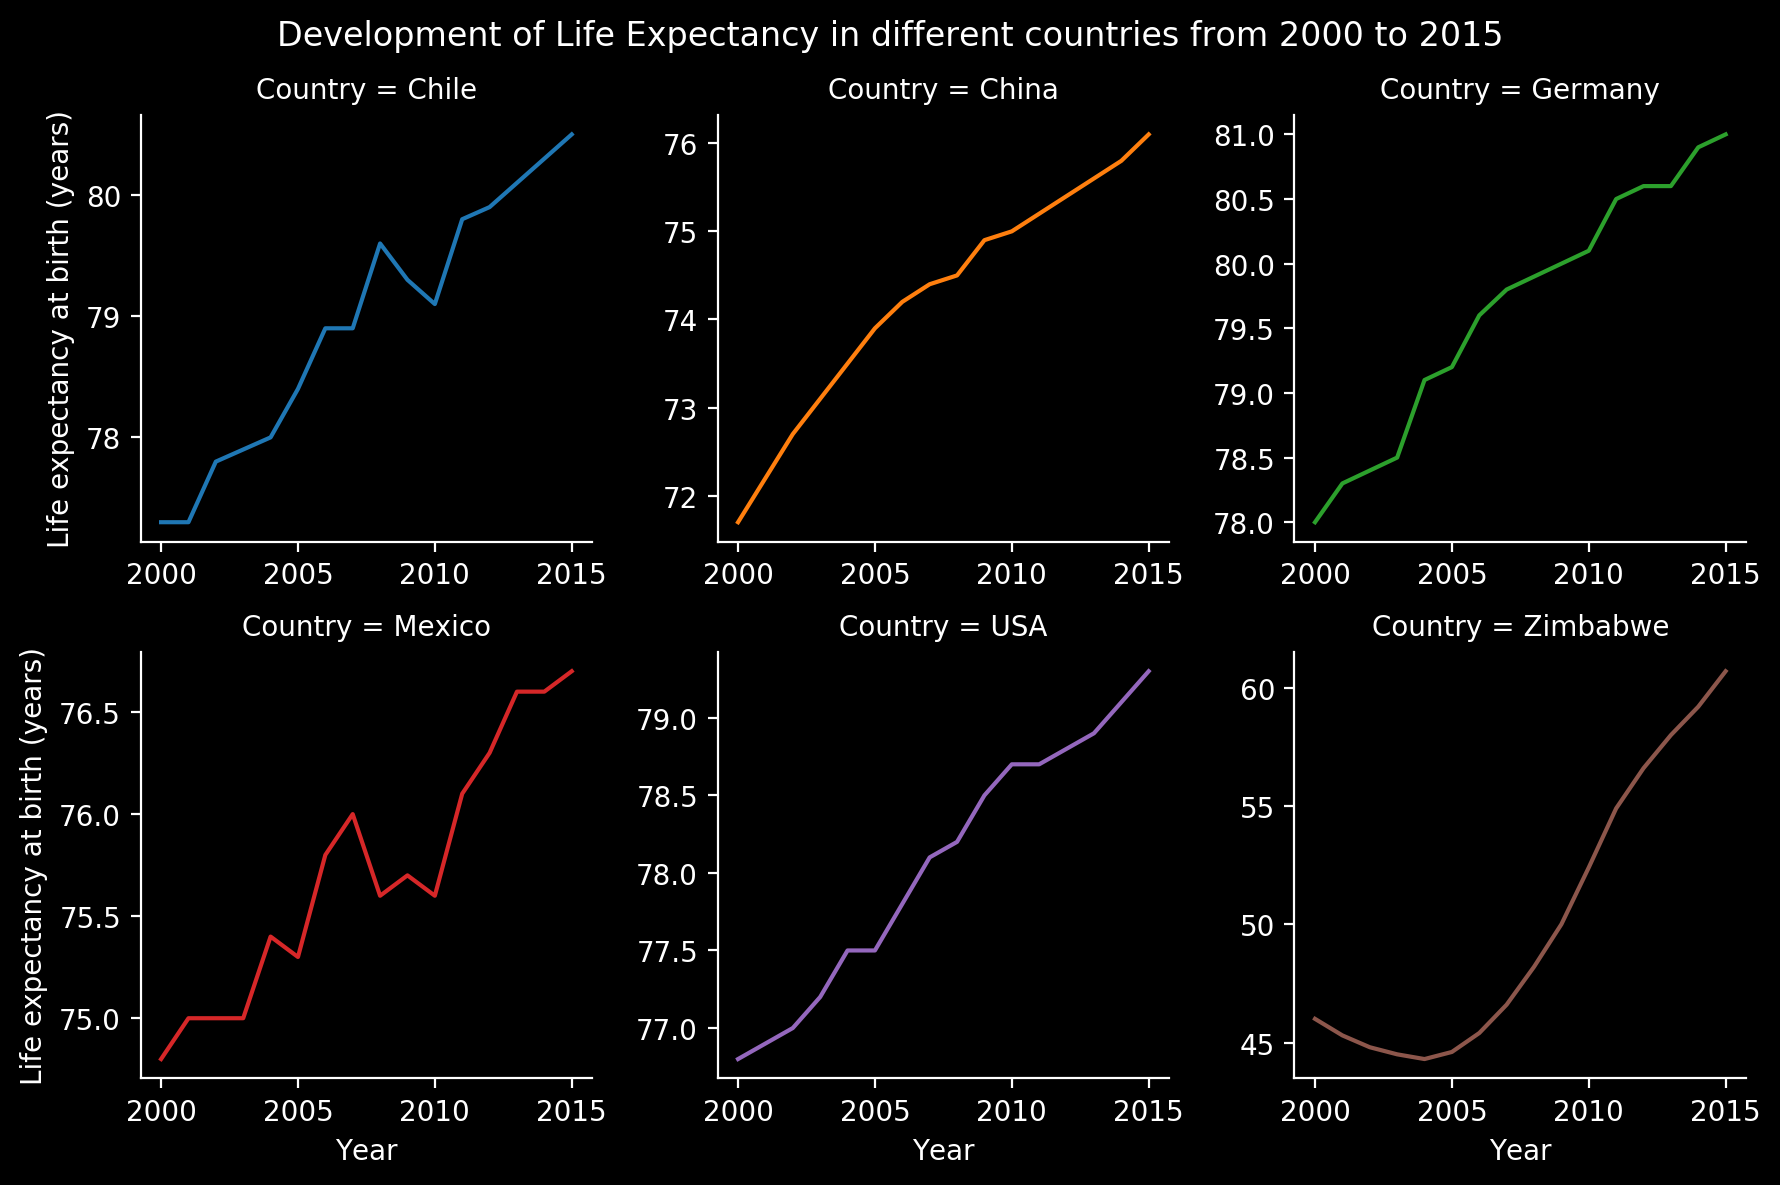

<Figure size 480x360 with 0 Axes>

In [5]:
# Lineplot of Life Expectancy vs Years
g = sns.FacetGrid(data=data, col='Country', col_wrap=3, hue='Country', sharex=False, sharey=False)
g.map(sns.lineplot,'Year','Life expectancy at birth (years)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Development of Life Expectancy in different countries from 2000 to 2015')
plt.show()
plt.clf()

The graphs above shows that through the years the Life Expectancy in every country grew. But, in Chile and Mexico around 2010 and in Zimbabwe around 2005 the Life Expectancy decreased. My assumption for Mexico and Chile is that this could be an effect of the econimc crisis of 2007. Maybe there is a similar reason for Zimbabwe.

Let's see if this hypothesis could be true and watch at the GDP of the countries. Next I am going to make a similar figure for the GDP.

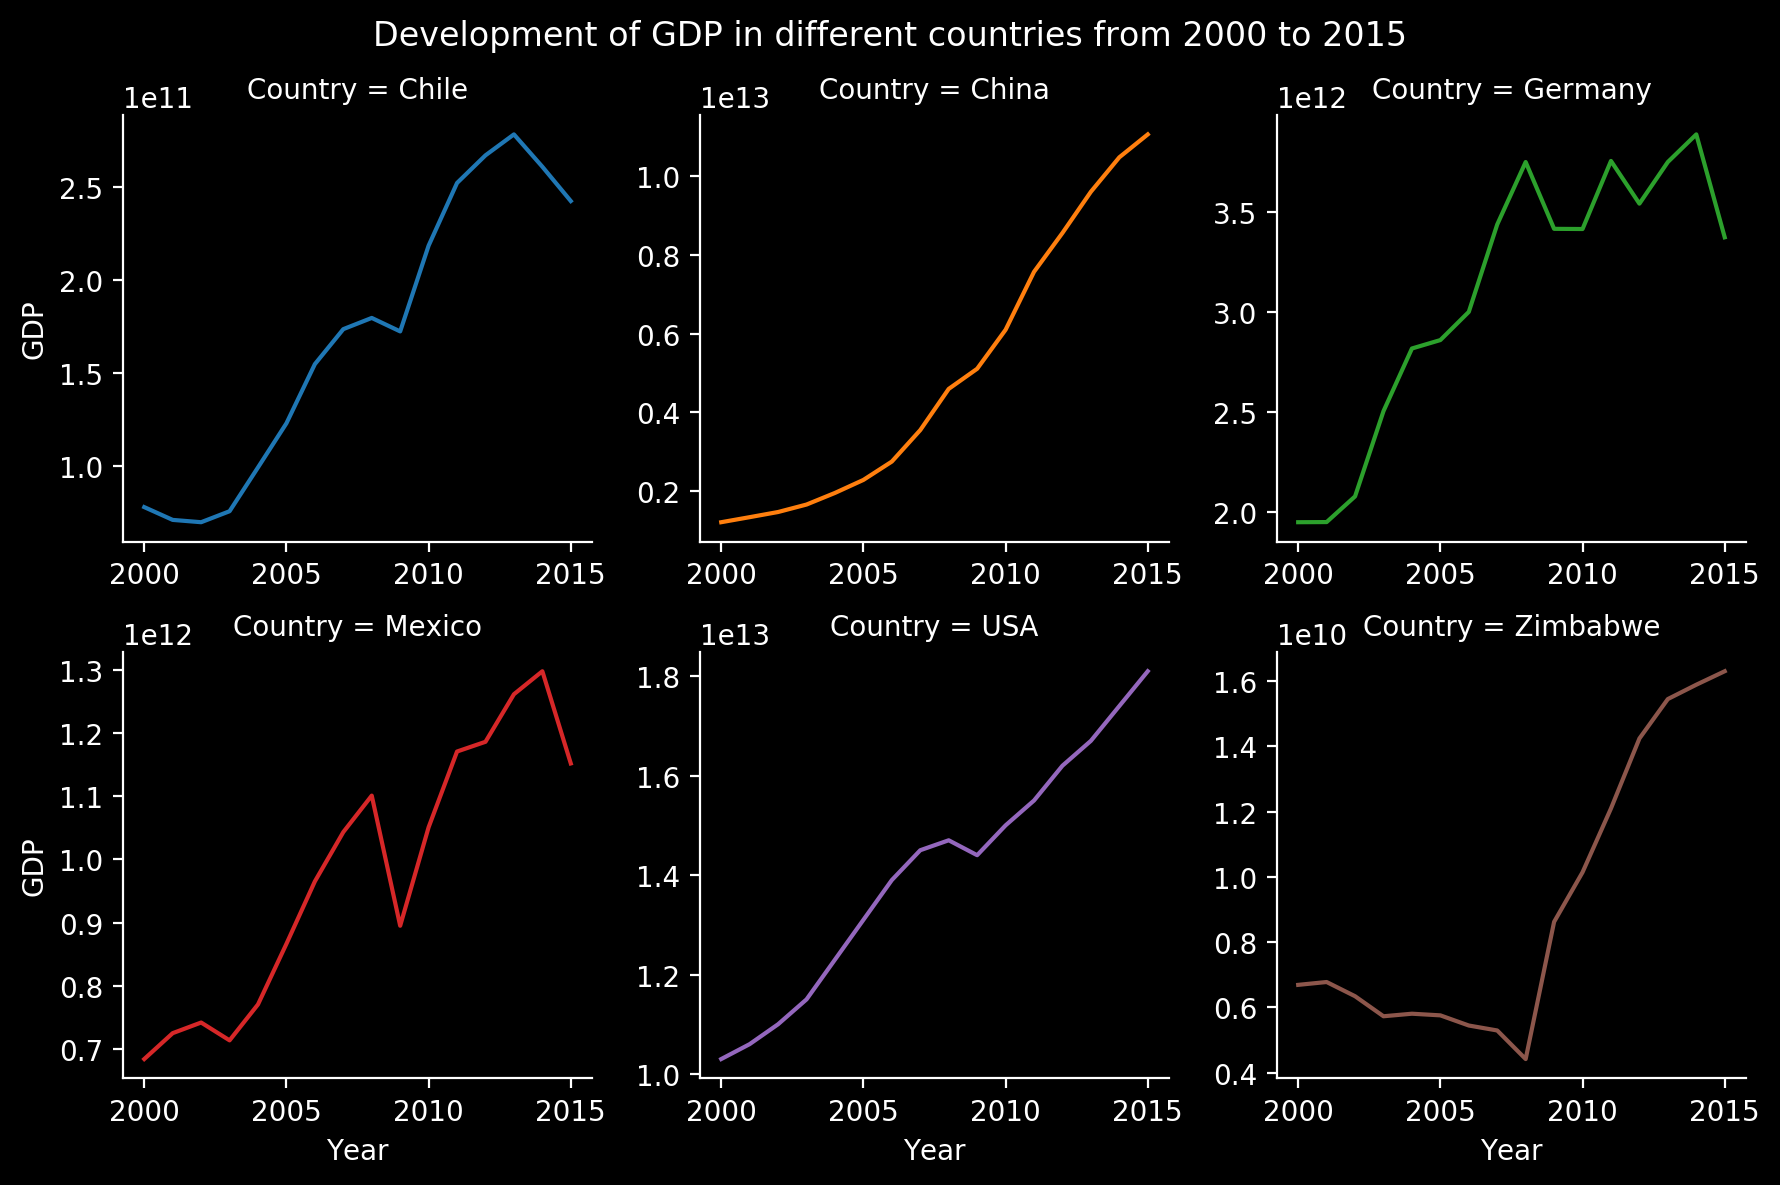

<Figure size 480x360 with 0 Axes>

In [18]:
# Lineplot of GDP vs Years
g = sns.FacetGrid(data=data, col='Country', col_wrap=3, hue='Country', sharex=False, sharey=False)
g.map(sns.lineplot,'Year','GDP')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Development of GDP in different countries from 2000 to 2015')
plt.show()
plt.clf()

In the figure above it can be seen, that there was an economical shrinkage (GDP) in Chile and Mexico in 2010 and in Zimbabwe until around 2008. The stagnant course of GDP in Germany, otherwise, had no effect on the Life Expectancy. On the other hand, in China and the USA both, the GDP and the Life Expectancy grew through the years. Even during the economic crisis in 2007.

Next, I will try to figure out, if there is a correlation of Life Expectancy and GDP in each country. Therefore, I will create scatterplots and make a linear regression.

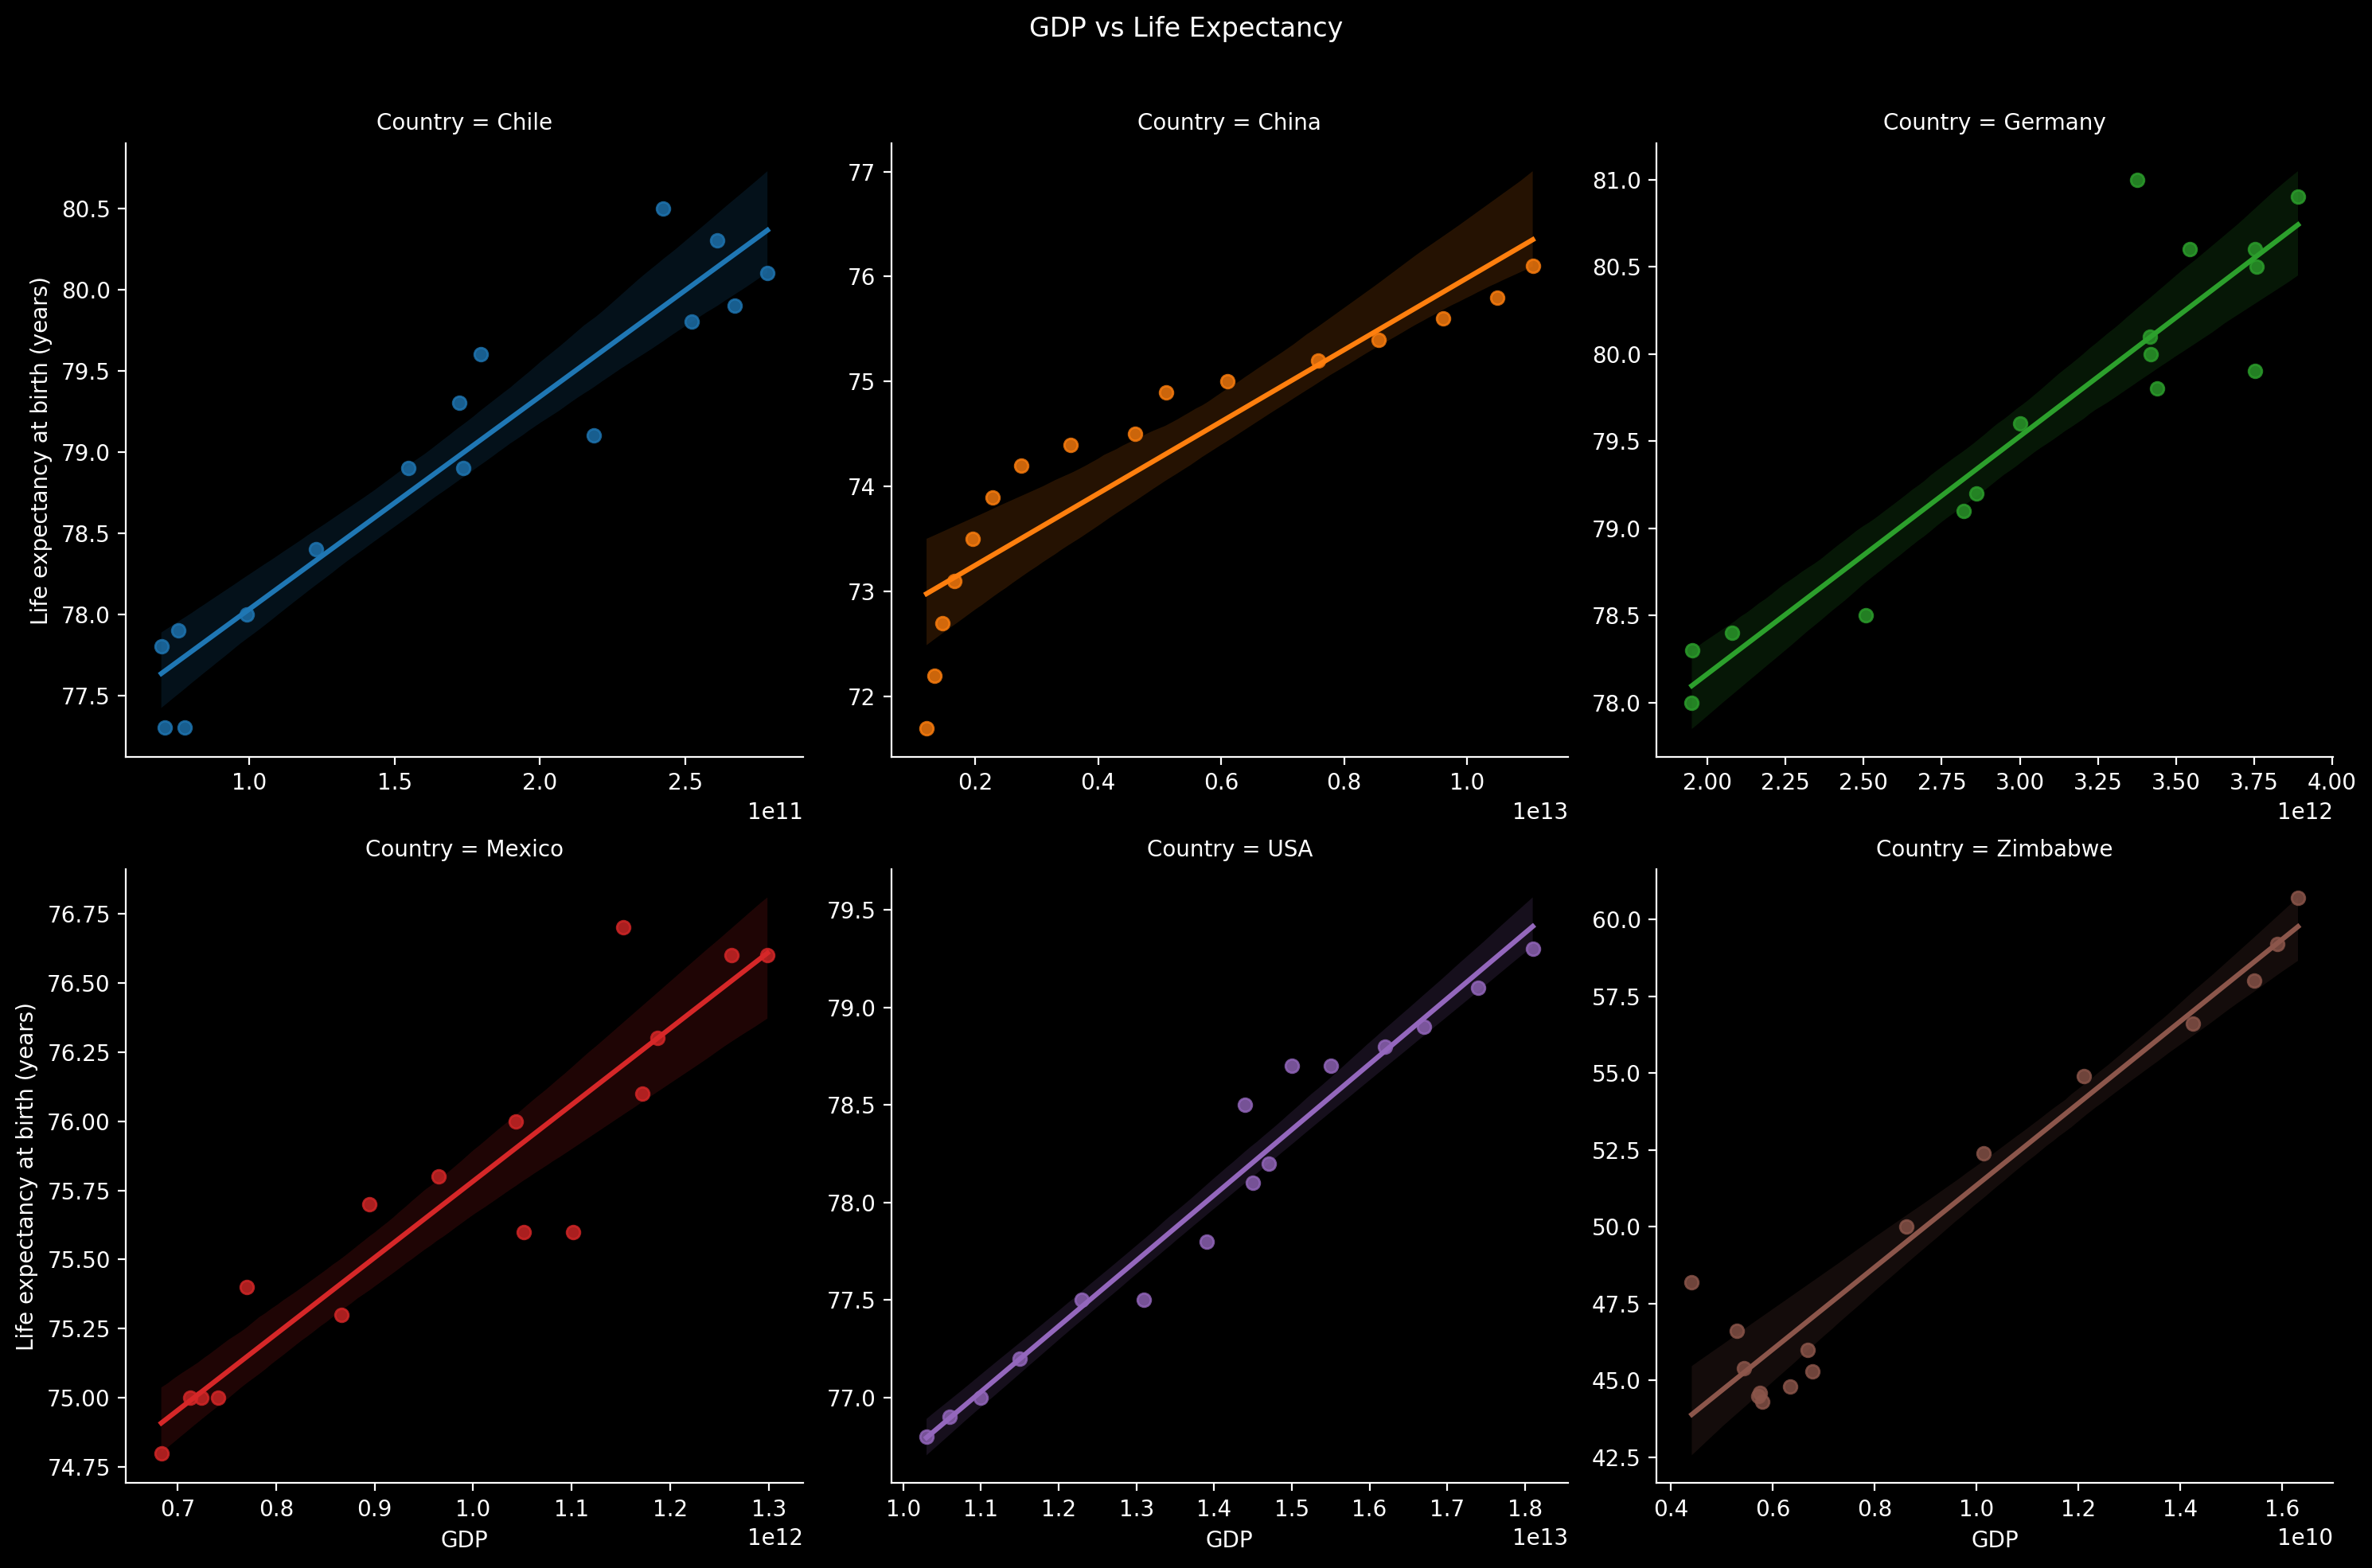

Chile: R=0.9499 p-Value=0.0000
China: R=0.9085 p-Value=0.0000
Germany: R=0.9327 p-Value=0.0000
Mexico: R=0.9322 p-Value=0.0000
USA: R=0.9817 p-Value=0.0000
Zimbabwe: R=0.9662 p-Value=0.0000


<Figure size 480x360 with 0 Axes>

In [7]:
# Create graphs with linear regressions
lm = sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=data, col='Country', col_wrap=3, hue='Country', facet_kws=dict(sharex=False, sharey=False))
lm.fig.subplots_adjust(top=0.9)
lm.fig.suptitle('GDP vs Life Expectancy')
plt.show()
plt.clf()

# Calculate Pearson correlation coefficient and the p-value for each country
countries = data.Country.unique()
for i in range(0, len(data.Country.unique())):
    temp_data = data.loc[data['Country']==countries[i]]
    r = pearsonr(temp_data['GDP'], temp_data['Life expectancy at birth (years)'])[0]
    p = pearsonr(temp_data['GDP'], temp_data['Life expectancy at birth (years)'])[1]
    print('%s: R=%.4f p-Value=%.4f' %(countries[i], r, p))

The plots and the Correlation Coefficient (R) show that there is a positive linear correlation between Life Expectancy and GDP in all countries. Due to the small p-values (<0.05) I conclude that the correlation is significant for all countries.

## Conclusion

The graphs above show, that both, the Life Expectancy and GDP, grew in six countries from all over the world. It seems like a world wide pattern with some interruptions around the time of the world economic crisis. 

Also, the last graph and some statistics imply, that there is a significant correlation between GDP and Life Expectancy in each of the countries. Because correlation is not causality, there could be different reasons, why both variables seem to grow, when the other grows, too. One could be, that medical products and a higher living standard are displayed in the GDP and are imminent for the Life Expectancies.

This was a nice little project, where I could find new tweaks to create graphs. During the project my main learning was, how powerful the seaborn module is. Many graphs can easily be displayed with sns.